In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import dataiku
from dataiku import pandasutils as pdu
import pandas as pd

In [3]:
img = dataiku.Folder("PSSOcropClass5")
img_info=img.get_info()
img_path=img_info['path']
data_path=img_path
print(img_path)
#print(data_path)

tes = dataiku.Folder("PSSOtest")
tes_info=tes.get_info()
tes_path=tes_info['path']


import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow
import splitfolders
import os
from PIL import Image,ImageOps,ImageFilter
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import io
from skimage.util import crop

import os
import scipy.fftpack
from collections import OrderedDict
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.layers import LeakyReLU,BatchNormalization,Dropout,Dense,Conv2D,Conv2DTranspose,ReLU,UpSampling2D,\
                                    Reshape,Flatten,ZeroPadding2D,Reshape,Input,Add
from tensorflow.keras.losses import MeanSquaredError
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from easydict import EasyDict as edict
from scipy.io import loadmat
from tensorflow.keras import Sequential
from tensorflow.keras.activations import tanh
from tensorflow.keras.optimizers import schedules, Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy,KLDivergence,BinaryCrossentropy,MeanSquaredError,\
                                    CategoricalCrossentropy
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.regularizers import l2
import tensorflow_hub as hub

from sklearn.cluster import KMeans,DBSCAN
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import sklearn

resnet = dataiku.Folder("google_resnet_v2")
resnet_info=resnet.get_info()
resnet_path=resnet_info['path']

effnet = dataiku.Folder("efficientV2")
effnet_info=effnet.get_info()
effnet_path=effnet_info['path']

output = dataiku.Folder("siamout")
output_info=output.get_info()
output_path=output_info['path']
model_path=output_path+"/siam_h1_demo.h5"

path_img=output_path+"/cm_h1_demo.png"

/apps/dataiku/dss_data/managed_folders/DUMMY/K5TQTYd2


In [4]:
import itertools
from sklearn.model_selection import train_test_split
import math
import cv2

In [5]:
#batch_size = 1
img_height = 128
img_width = 128
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    #featurewise_center=True,
    #featurewise_std_normalization=True,
    #rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.7, 1.3],
    shear_range=0.2,
    vertical_flip=True,
    horizontal_flip = True,
    #zoom_range = [0.8, 1.2],
    rescale=1./255,
    #validation_split=0.25
    )
train_ds=train_datagen.flow_from_directory(
    img_path,
    target_size=(img_height,img_width),
    color_mode='rgb',
    class_mode='binary',
    batch_size=267,
    shuffle=True,
    subset='training'
    )
val_ds=train_datagen.flow_from_directory(
    img_path,
    target_size=(img_height,img_width),
    color_mode='rgb',
    class_mode='binary',
    #batch_size=0,
    shuffle=True,
    subset='validation'
    )

Found 128 images belonging to 3 classes.
Found 0 images belonging to 3 classes.


In [6]:
len(train_ds.filenames)

128

In [7]:
#len(train_ds.filenames)/32

In [8]:
x_train, y_train =train_ds.next()

/apps/dataiku/dss_data/code-envs/python/ENV1/lib/python3.9/site-packages/keras/src/preprocessing/image.py:2611: DeprecationWarning: Please import `affine_transform` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  ndimage.interpolation.affine_transform(


In [9]:
#x_test,y_test=val_ds.next()

In [10]:
x_train.shape

(128, 128, 128, 3)

In [11]:
y_train.shape

(128,)

In [12]:
def make_paired_dataset(X, y):
    X_pairs, y_pairs = [], []

    tuples = [(x1, y1) for x1, y1 in zip(X, y)]

    for t in itertools.product(tuples, tuples):
        pair_A, pair_B = t
        #print(pair_A)
        #print(pair_B)
        img_A, label_A = t[0]
        img_B, label_B = t[1]
        #print(t)

        new_label = int(label_A == label_B)

        X_pairs.append([img_A, img_B])
        y_pairs.append(new_label)

    X_pairs = np.array(X_pairs)
    y_pairs = np.array(y_pairs)

    return X_pairs, y_pairs

In [13]:
#make_paired_dataset(x_train, y_train)

In [14]:
#x_trainp,y_trainp=make_paired_dataset(x_train, y_train)

In [15]:
#x_trainp.shape,y_trainp.shape

In [16]:
#x, xtest, y, ytest = train_test_split(x_trainp,y_trainp,test_size=0.25,shuffle=True)
#x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = 0.15,shuffle=True)
x, x_test, y, y_test = train_test_split(x_train,y_train,test_size=0.25,shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = 0.15,shuffle=True)
#x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size = 0.15,shuffle=True)

In [17]:
x_train.shape,y_train.shape

((81, 128, 128, 3), (81,))

In [18]:
x_val.shape,y_val.shape

((15, 128, 128, 3), (15,))

In [19]:
x_test.shape,y_test.shape

((32, 128, 128, 3), (32,))

In [20]:
xtrain,ytrain=make_paired_dataset(x_train, y_train)

In [21]:
xval,yval=make_paired_dataset(x_val, y_val)

In [22]:
xtest,ytest=make_paired_dataset(x_test, y_test)

In [23]:
xtrain.shape,ytrain.shape

((6561, 2, 128, 128, 3), (6561,))

In [24]:
xval.shape,yval.shape

((225, 2, 128, 128, 3), (225,))

In [25]:
xtest.shape,ytest.shape

((1024, 2, 128, 128, 3), (1024,))

In [26]:
c=0
for x in ytest:
    if(x==0):
        c=c+1
print(c)

538


In [27]:
def get_cnn_block(depth):
    return Sequential([Conv2D(depth, 3, 1),
                     BatchNormalization(),
                     ReLU()])
img_A_inp = Input((128, 128,3), name='img_A_inp')
img_B_inp = Input((128, 128,3), name='img_B_inp')
#DEPTH = 64
net= tf.keras.Sequential([#Conv2D(3, (2, 2), strides=1, padding='same'),
            hub.KerasLayer(effnet_path,trainable=True)  # Can be True, see below.
        ]
        )

feature_vector_A = net(img_A_inp)
feature_vector_B = net(img_B_inp)

concat = tf.keras.layers.Concatenate()([feature_vector_A, feature_vector_B])

dense = Dense(1024, activation='leaky_relu')(concat)
output = Dense(1, activation='sigmoid')(dense)

model = Model(inputs=[img_A_inp, img_B_inp], outputs=output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img_A_inp (InputLayer)      [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 img_B_inp (InputLayer)      [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 sequential (Sequential)     (None, 1280)                 2076158   ['img_A_inp[0][0]',           
                                                          32         'img_B_inp[0][0]']           
                                                                                                  
 concatenate (Concatenate)   (None, 2560)                 0         ['sequential[0][0]',      

In [28]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [29]:
lr_reducer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=2, min_lr=10e-7, cooldown=1, verbose=1)
early_stopper = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1)

class terminate(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        keys = list(logs.keys())
        #print("End epoch {} of training; got log keys: {}".format(epoch, keys))
        if(logs.get('accuracy') >= 0.97):
            print("\t 100% accuracy reached, stopping training!!")
            self.model.stop_training = True
        elif(logs.get('val_accuracy') >= 0.98):
            print("\t 100% val accuracy reached, stopping training!!")
            self.model.stop_training = True
callbacks= [lr_reducer, early_stopper,terminate()]

In [30]:
model.load_weights(output_path+"/siam_h2.h5")

In [31]:
history=model.fit([xtrain[:, 0, :, :,:], xtrain[:, 1, :, :,:]],ytrain,epochs=10,\
                  validation_data=([xval[:, 0, :, :,:], xval[:, 1, :, :,:]],yval),callbacks=callbacks)

Epoch 1/10
206/206 [==============================] - 1070s 5s/step - loss: 0.2723 - accuracy: 0.8918 - val_loss: 0.9288 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2/10
206/206 [==============================] - 953s 5s/step - loss: 0.0588 - accuracy: 0.9843 - val_loss: 1.4875 - val_accuracy: 0.8044 - lr: 0.0010


In [32]:
#model.load_weights(output_path+"/siam_h1_v2.h5")

In [33]:
#results=model.evaluate([xtest[:, 0, :, :,:], xtest[:, 1, :, :,:]],ytest, batch_size=8)

In [34]:
#print(results)

In [35]:
#test_steps = xtest.shape[0]
y_pred = []
y_true = []

#X_val, y_val = test_ds.next()
#print(y_val)
y_pred = model.predict([xtest[:, 0, :, :,:], xtest[:, 1, :, :,:]])
#print(np.argmax(y_pred_batch, axis=1))
#y_pred.extend(np.argmax(y_pred_batch, axis=1))
#print(np.argmax(ytest, axis=1))
#y_true.extend(np.argmax(y_val, axis=1))

32/32 [==============================] - 36s 943ms/step


In [36]:
y_pred

array([[9.9769598e-01],
       [2.7888690e-04],
       [9.9793166e-01],
       ...,
       [2.5254882e-05],
       [2.4422932e-05],
       [9.9999815e-01]], dtype=float32)

In [37]:
ytest

array([1, 0, 1, ..., 0, 0, 1])

In [38]:
c=0
for x in ytest:
    if(x==0):
        c=c+1
print(c)

538


In [39]:
ypred=np.rint(y_pred)

In [40]:
ypred

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

In [41]:
cm = confusion_matrix(ytest, ypred, labels=[0, 1])

In [42]:
print(cm)

[[504  34]
 [  1 485]]


In [43]:
plt.clf()

<Figure size 640x480 with 0 Axes>

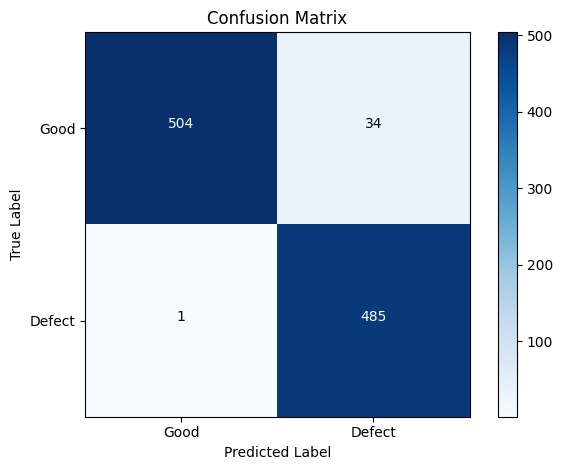

In [44]:
class_labels = ['Good', 'Defect']
fig=plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Label the matrix cells with the counts
thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig(path_img)

In [45]:
path_img

'/apps/dataiku/dss_data/managed_folders/DUMMY/XALGlP18/cm_h1_demo.png'

In [46]:
#plt.show()

In [47]:
from sklearn.metrics import precision_score
precision = precision_score(ytest, ypred, average='binary')
print("precision:",precision)

from sklearn.metrics import recall_score
recall = recall_score(ytest, ypred, average='binary')
print("recall:",recall)

f1=sklearn.metrics.f1_score(ytest, ypred)
print("F1 score:",f1)

precision: 0.9344894026974951
recall: 0.9979423868312757
F1 score: 0.9651741293532339


In [48]:
model.save_weights(model_path)

In [49]:
os.listdir(tes_path)

['1_12_1_14-fail.jpg',
 '4_62_1_3-fail.jpg',
 '1_10_3_2-fail.jpg',
 '2_12_4_23-fail.jpg',
 '1_12_4_23-fail.jpg']

In [153]:
img_b_path=tes_path+"/1_12_4_23-fail.jpg"
img_b_pres_path=data_path+"/broken wire/1_53_4_9-fail.jpg"

In [154]:
img_b=Image.open(img_b_path)

In [155]:
img_bp=Image.open(img_b_pres_path)

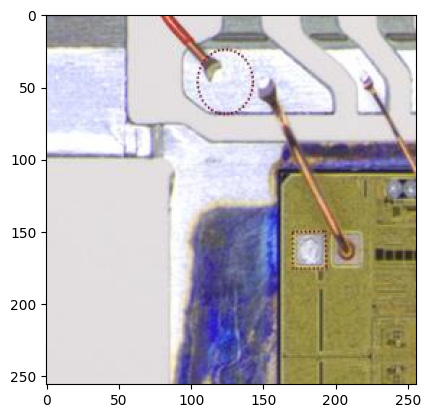

In [156]:
plt.imshow(img_bp)

In [157]:
img_b=img_b.resize((128,128))
img_bp=img_bp.resize((128,128))

In [158]:
img_b_np=np.asarray(img_b)
img_b_np=img_b_np/255
img_bp_np=np.asarray(img_bp)
img_bp_np=img_bp_np/255

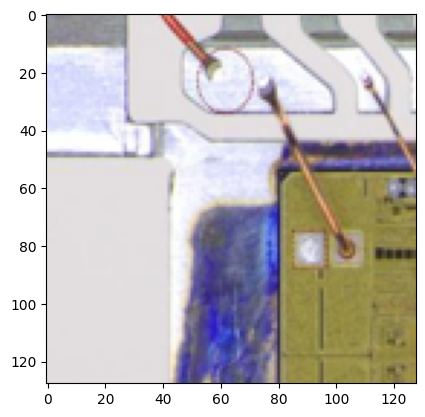

In [159]:
plt.imshow(img_bp_np)

In [160]:
img_m_path=tes_path+"/2_12_4_23-fail.jpg"
img_m_pres_path=data_path+"/missing corner/2_29_1_24-fail.jpg"

img_m=Image.open(img_m_path)

img_mp=Image.open(img_m_pres_path)

img_m=img_m.resize((128,128))
img_mp=img_mp.resize((128,128))

img_m_np=np.asarray(img_m)
img_mp_np=np.asarray(img_mp)

img_m_np=img_m_np/255
img_mp_np=img_mp_np/255

In [161]:
img_m_path2=tes_path+"/1_10_3_2-fail.jpg"
img_m_pres_path2=data_path+"/missing corner/1_23_3_3-fail.jpg"

img_m2=Image.open(img_m_path2)

img_mp2=Image.open(img_m_pres_path2)

img_m2=img_m2.resize((128,128))
img_mp2=img_mp2.resize((128,128))

img_m_np2=np.asarray(img_m2)
img_mp_np2=np.asarray(img_mp2)

img_m_np2=img_m_np2/255
img_mp_np2=img_mp_np2/255

In [162]:

img_m_pres_path3=data_path+"/missing corner/1_18_3_17-fail.jpg"



img_mp3=Image.open(img_m_pres_path3)


img_mp3=img_mp3.resize((128,128))


img_mp_np3=np.asarray(img_mp3)


img_mp_np3=img_mp_np3/255

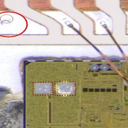

In [163]:
img_mp3

In [171]:
img_b_pres_path2=data_path+"/broken wire/2_22_3_24-fail.jpg"



img_bp2=Image.open(img_b_pres_path2)


img_bp2=img_bp2.resize((128,128))


img_bp_np2=np.asarray(img_bp2)


img_bp_np2=img_bp_np2/255

In [183]:
img_p_path=tes_path+"/4_62_1_3-fail.jpg"
img_p_pres_path=data_path+"/present corner/1_23_4_21-fail.jpg"

img_p=Image.open(img_p_path)

img_pp=Image.open(img_p_pres_path)

img_p=img_p.resize((128,128))
img_pp=img_pp.resize((128,128))

img_p_np=np.asarray(img_p)
img_pp_np=np.asarray(img_pp)

img_p_np=img_p_np/255
img_pp_np=img_pp_np/255

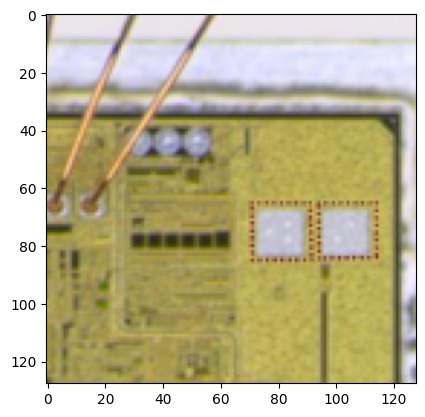

In [60]:
plt.imshow(img_m_np)

In [61]:
#rtest=make_paired_dataset(iA_np,iB_np)

In [62]:
#model.predict(iA_np, iB_np)

In [63]:
i=[]
i.append(img_b_np)
i.append(img_m_np)
i.append(img_bp_np)
i.append(img_mp_np)

In [64]:
i_np=np.asarray(i,dtype=float32)
#iB_np=np.asarray(iB,dtype=float32)

In [65]:
xtest[:, 1, :, :,:].shape

(1024, 128, 128, 3)

In [66]:
#pred = model.predict([i[:, 0, :, :,:], xtest[5, 1, :, :,:]])

In [67]:
i_np.shape

(4, 128, 128, 3)

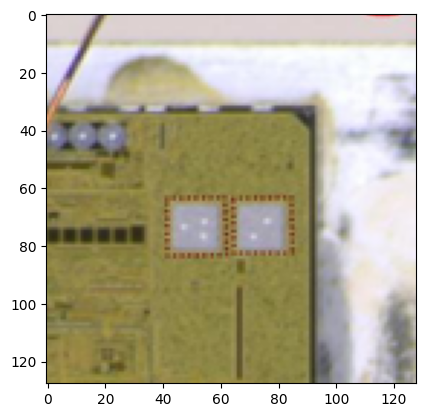

In [68]:
plt.imshow(i_np[3])

In [69]:
#plt.imshow(x_train[3])

In [190]:
X=[[img_b_np,img_bp_np],[img_m_np,img_mp_np],[img_m_np2,img_mp_np2],[img_m_np2,img_pp_np],[img_p_np,img_pp_np],\
   [img_b_np,img_pp_np],[img_m_np,img_pp_np],[img_b_np,img_mp_np],[img_m_np,img_bp_np2],[img_b_np,img_mp_np2]]
X_np=np.array(X)

In [191]:
X_np.shape

(10, 2, 128, 128, 3)

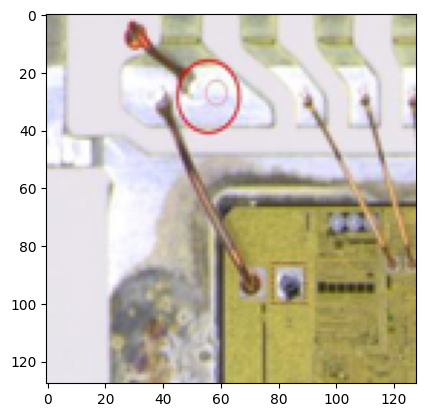

In [200]:
plt.imshow(X_np[9, 0, :, :,:])

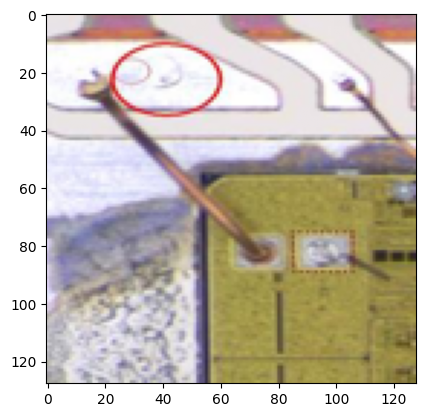

In [201]:
plt.imshow(X_np[9, 1, :, :,:])

In [194]:
pred = model.predict([X_np[:, 0, :, :,:], X_np[:, 1, :, :,:]])

1/1 [==============================] - 0s 467ms/step


In [195]:
pred

array([[9.3245810e-01],
       [9.9869859e-01],
       [9.9977982e-01],
       [8.6048327e-04],
       [6.4989924e-01],
       [4.3973443e-01],
       [5.2389237e-03],
       [2.1985862e-03],
       [7.7326298e-03],
       [8.8104969e-03]], dtype=float32)